# Copyright 2022 Cognite AS

## Import the Libraries and Modules

In [1]:
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join("../utils"))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/keepfloyding/Projects/academy/using-cognite-python-sdk/utils


In [3]:
import auth as cauth

## Create the Cognite Client

In [4]:
c = cauth.create_cognite_client()

Opening in existing browser session.


libva error: vaGetDriverNameByIndex() failed with unknown libva error, driver_name = (null)


## List operation

**Code Pattern**
`client.<cdf_resource_type>.list()`
where **cdf_resource_type** = { data_sets, assets, time_series, events, files, labels, sequences, relationships ... }


### List the CDF Resource types

In [5]:
c.data_sets.list()

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,test_dataset8,test_dataset8,{},False,404471063348808,1657143733168,1657143733168,NaN
1,my_example_dataset,my_example_dataset,{},False,1399248851345249,1657199513845,1657201639823,New description with Partial Update
2,first_level,1st level,{},False,1900770456801810,1657199464830,1657199464830,NaN
3,NaN,my_test_dataset,{},False,1929610961715132,1657190954116,1657190954116,NaN
4,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740,NaN
5,NaN,2nd level,{'archived': 'true'},False,2697380900418431,1657198128127,1657198654684,NaN
6,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665,NaN
7,world_info_andris,NaN,{},True,4014420929451670,1659002843571,1659002843571,NaN
8,test_dataset4,test_dataset4,{},False,4198465485109543,1657143732881,1657143732881,NaN
9,NaN,my_test_dataset,{},False,4397486057907956,1657198128258,1657198128258,NaN


In [6]:
c.assets.list(limit=5)

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,id,created_time,last_updated_time,root_id
0,1551417927529342,23-TAH-92539,6459961409773445,6079953337268935,VRD - PH 1STSTGCOMP DISCHARGE : TEMPERATURE AL...,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,6615943284975,1652690345913,1659710592495,2075231145010555
1,1800536337849650,23-FT-96167,7247369845328821,3904753668320840,VRD - PH 1STSTG COMPR BAL PISTON LEAK,4990976646580978,"{'ELC_STATUS_ID': '1225', 'RES_ID': '495164', ...",petro-tech-staging,12707299535082,1652690345913,1659710592495,2075231145010555
2,5263601374807048,23-TE-96111-04,8109972319743882,3117826349444493,VRD - PH 1STSTGGEAR 1 JOURNBRG DE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '525283', ...",petro-tech-staging,17321536225065,1652690345913,1659710592495,2075231145010555
3,6989199408991281,23-PT-92531-01,2760401877477005,5231415482805125,SOFT TAG VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,18037117592759,1652690345913,1659710592495,2075231145010555
4,8486796384181384,23-YI-96120-02,481322793259164,2227583191295299,SOFT TAG VRD - PH 1STSTGGEAR 2 JOURNBRG DE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,43703862122077,1652690345913,1659710592495,2075231145010555


In [7]:
df = c.time_series.list(limit=None).to_pandas()

In [8]:
df.shape

(413, 13)

In [9]:
c.events.list(limit=5)

,end_time,type,subtype,metadata,asset_ids,source,id,last_updated_time,created_time,start_time
0,1468108800000,Workpackage,VAL,"{'source': 'akerbp-cdp', 'sourceId': '66745706...",[8628084799352049],akerbp-cdp,4920516620586718,1653486834301,1653486834301,<NA>
1,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '29', 'WORKPACK...",[8628084799352049],akerbp-cdp,1718750633905430,1653486835160,1653486835160,0
2,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,2338996459974391,1653486834974,1653486834974,0
3,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,3239587593224470,1653486835488,1653486835488,0
4,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '173', 'WORKPAC...",[8628084799352049],akerbp-cdp,3338669023839735,1653486835385,1653486835385,0


In [10]:
c.files.list(limit=5)

,name,asset_ids,data_set_id,id,uploaded,uploaded_time,created_time,last_updated_time,source,external_id
0,Jordan_data_sheet,[3518903843663221],6133408726791096,375953243056120,True,1659370239465,1659370238985,1659370238985,NaN,NaN
1,handler.zip,NaN,<NA>,410249806612463,True,1658837551439,1658837551342,1658837551342,Datastudio,NaN
2,PH-ME-P-0004-001.pdf,[8628084799352049],<NA>,751071820891431,True,1657139202826,1657139202305,1657186316980,NaN,NaN
3,Thermal Performance Calculation.zip,NaN,<NA>,809392138326632,True,1659535625600,1658393853116,1659535625514,NaN,hx_thermal_perf
4,Nicaragua_data_sheet,[6863695615472442],6133408726791096,1177257115065299,True,1659370241706,1659370241253,1659370241253,NaN,NaN


Similar code for listing other resource types


```
c.labels.list()
```
```
c.sequences.list()
```
```
c.relationships.list()
```


There are no labels in Publicdata, need to create some dummy may be.

In [11]:
c.labels.list(limit=5)

,external_id,name,created_time,data_set_id
0,cold-countries,Cold Climate Countries,1658795787302,4603840493329850
1,REGION,REGION,1657141671698,<NA>
2,COUNTRY,COUNTRY,1657141671698,<NA>
3,industrial-assets,Industrial Assets,1659710980824,4990976646580978
4,BALTIC,BALTIC,1657143421635,<NA>


In [12]:
c.sequences.list(limit=5)

,id,external_id,metadata,columns,created_time,last_updated_time,data_set_id,name,description
0,2357839693666680,my_sequence,{},"[{'externalId': 'user', 'description': 'some d...",1657191142856,1657191142856,1929610961715132,NaN,NaN
1,7408721814460392,world_table,{},"[{'externalId': 'name', 'valueType': 'STRING',...",1657147108981,1657147401929,5548572851312583,world_table,Table containing data about countries of world
2,8726735623634190,my_test_sequence,{},"[{'externalId': 'user', 'description': 'some d...",1657199968405,1657199968405,1399248851345249,my test sequence,NaN


In [13]:
c.relationships.list(limit=5)

,external_id,source_external_id,source_type,target_external_id,target_type,confidence,data_set_id,created_time,last_updated_time,labels
0,norway_neighbours_1,Norway,asset,Sweden,asset,1.0,5548572851312583,1657144744739,1657144744739,[]
1,norway_neighbours_2,Norway,asset,Finland,asset,1.0,5548572851312583,1657144744739,1657144744739,[]
2,flow_12,asset1,asset,asset2,asset,0.1,1929610961715132,1657191250639,1657191250639,[]
3,flow_21,asset2,asset,asset1,asset,0.1,1929610961715132,1657191250639,1657191250639,[]
4,flow_12_test,asset1,asset,asset2,asset,0.1,1399248851345249,1657200238497,1657200238497,[]


### Filter the list results

using label filter

In [14]:
from cognite.client.data_classes import LabelFilter

In [15]:
c.assets.list(labels=LabelFilter(contains_all=["industrial-assets"]),limit=5)

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,labels,id,created_time,last_updated_time,root_id
0,3147733389929639,23-PT-92539,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],530938239405143,1652690345913,1659711519078,2075231145010555
1,4168462116468060,23-FV-92542,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP HOT GAS BP,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '569424', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],658280145774543,1652690345913,1659711519078,2075231145010555
2,6412414807505833,PH-S-2217,3090407404695366,7372310232665628,"VRD - 32""X 30"" FLANGED TRANSITION",4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,[{'externalId': 'industrial-assets'}],1139856576147276,1652690345913,1659711519078,2075231145010555
3,8693879864360723,PH-S-2301,3090407404695366,7372310232665628,VRD - NOISE CONTROL SPOOL (1ST STAGE COMPRESS....,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,[{'externalId': 'industrial-assets'}],1253705542919441,1652690345913,1659711519078,2075231145010555
4,6914191520599898,23-PT-92536,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],1790134541443547,1652690345913,1659711519078,2075231145010555


In [19]:
from cognite.client.data_classes import LabelFilter

In [16]:
c.assets.list(labels=LabelFilter(contains_any=["industrial-assets"]))

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,labels,id,created_time,last_updated_time,root_id
0,3147733389929639,23-PT-92539,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],530938239405143,1652690345913,1659711519078,2075231145010555
1,4168462116468060,23-FV-92542,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP HOT GAS BP,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '569424', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],658280145774543,1652690345913,1659711519078,2075231145010555
2,6412414807505833,PH-S-2217,3090407404695366,7372310232665628,"VRD - 32""X 30"" FLANGED TRANSITION",4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,[{'externalId': 'industrial-assets'}],1139856576147276,1652690345913,1659711519078,2075231145010555
3,8693879864360723,PH-S-2301,3090407404695366,7372310232665628,VRD - NOISE CONTROL SPOOL (1ST STAGE COMPRESS....,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,[{'externalId': 'industrial-assets'}],1253705542919441,1652690345913,1659711519078,2075231145010555
4,6914191520599898,23-PT-92536,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],1790134541443547,1652690345913,1659711519078,2075231145010555
5,4000726707241485,23-TT-92533,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '653983', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],2371058489692925,1652690345913,1659711519078,2075231145010555
6,5231415482805125,23-PT-92531,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],2760401877477005,1652690345913,1659711519078,2075231145010555
7,2612820682924773,23-PDT-92530,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP SUCT STR,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '500778', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],3548217158224788,1652690345913,1659711519078,2075231145010555
8,1543828113500234,23-PT-92537,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],3683103197587254,1652690345913,1659711519078,2075231145010555
9,976052247321041,23-FE-92537,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '530509', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],4181622044297101,1652690345913,1659711519078,2075231145010555


using metadata filter

In [17]:
# First get some metadata keys to inspect
c.assets.list(limit=5).to_pandas()['metadata'][4]

{'ELC_STATUS_ID': '1211',
 'SOURCE_DB': 'workmate',
 'SOURCE_TABLE': 'wmate_dba.wmt_tag',
 'WMT_AREA_ID': '1600',
 'WMT_CATEGORY_ID': '1152',
 'WMT_CONTRACTOR_ID': '1686',
 'WMT_FUNC_CODE_ID': '11275',
 'WMT_LOCATION_ID': '1004',
 'WMT_SYSTEM_ID': '4440',
 'WMT_TAG_CREATED_DATE': '2012-12-13 14:18:08',
 'WMT_TAG_CRITICALLINE': 'N',
 'WMT_TAG_DESC': 'SOFT TAG VRD - PH 1STSTGGEAR 2 JOURNBRG DE',
 'WMT_TAG_GLOBALID': '1000000000251075',
 'WMT_TAG_HISTORYREQUIRED': 'Y',
 'WMT_TAG_ID': '683289',
 'WMT_TAG_ID_ANCESTOR': '346942',
 'WMT_TAG_ISACTIVE': '1',
 'WMT_TAG_ISOWNEDBYPROJECT': '0',
 'WMT_TAG_MAINID': '681760',
 'WMT_TAG_NAME': '23-YI-96120-02',
 'WMT_TAG_STATUSCHGDATE': '2014-10-06 07:45:15',
 'WMT_TAG_UPDATED_BY': '1001',
 'WMT_TAG_UPDATED_DATE': '2015-10-09 11:56:31'}

In [18]:
# Get the assets list satisfying metadata filter
c.assets.list(metadata={'ELC_STATUS_ID': '1211'},limit=5)

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,id,created_time,last_updated_time,root_id
0,1551417927529342,23-TAH-92539,6459961409773445,6079953337268935,VRD - PH 1STSTGCOMP DISCHARGE : TEMPERATURE AL...,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,6615943284975,1652690345913,1659710592495,2075231145010555
1,5263601374807048,23-TE-96111-04,8109972319743882,3117826349444493,VRD - PH 1STSTGGEAR 1 JOURNBRG DE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '525283', ...",petro-tech-staging,17321536225065,1652690345913,1659710592495,2075231145010555
2,6989199408991281,23-PT-92531-01,2760401877477005,5231415482805125,SOFT TAG VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,18037117592759,1652690345913,1659710592495,2075231145010555
3,8486796384181384,23-YI-96120-02,481322793259164,2227583191295299,SOFT TAG VRD - PH 1STSTGGEAR 2 JOURNBRG DE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,43703862122077,1652690345913,1659710592495,2075231145010555
4,1251158239225724,23-YE-96134-01,458991222737140,6191827428964450,VRD - PH 1STSTG MOTOR JOURN BRG DE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531118', ...",petro-tech-staging,54823530117950,1652690345913,1659710592495,2075231145010555


Other filters

In [19]:
c.data_sets.list()

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,test_dataset8,test_dataset8,{},False,404471063348808,1657143733168,1657143733168,NaN
1,my_example_dataset,my_example_dataset,{},False,1399248851345249,1657199513845,1657201639823,New description with Partial Update
2,first_level,1st level,{},False,1900770456801810,1657199464830,1657199464830,NaN
3,NaN,my_test_dataset,{},False,1929610961715132,1657190954116,1657190954116,NaN
4,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740,NaN
5,NaN,2nd level,{'archived': 'true'},False,2697380900418431,1657198128127,1657198654684,NaN
6,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665,NaN
7,world_info_andris,NaN,{},True,4014420929451670,1659002843571,1659002843571,NaN
8,test_dataset4,test_dataset4,{},False,4198465485109543,1657143732881,1657143732881,NaN
9,NaN,my_test_dataset,{},False,4397486057907956,1657198128258,1657198128258,NaN


In [20]:
c.data_sets.list(write_protected=True)

,external_id,metadata,write_protected,id,created_time,last_updated_time,name,description
0,world_info_andris,{},True,4014420929451670,1659002843571,1659002843571,NaN,NaN
1,my_world_info,{},True,4603840493329850,1658760319681,1658760319681,my_world_info,NaN
2,Valhall OID,{},True,4990976646580978,1659710382293,1659710382293,Valhall OID,NaN
3,world_info,{},True,5548572851312583,1652688654772,1652688654772,world_info,NaN
4,world_info_jack,{},True,6133408726791096,1659027191963,1659027191963,world_info_jack,NaN
5,VAL/FILES/PNIDS,{},True,7129880323294884,1657137379832,1657137379832,Valhall system 23 P&IDs,Piping and instrumentation diagrams from Valha...


In [21]:
c.labels.list(limit=5, name="NORDIC")

,external_id,name,created_time
0,NORDIC,NORDIC,1657142354433


In [22]:
c.assets.list(root=True)

,external_id,name,description,data_set_id,metadata,id,created_time,last_updated_time,root_id,source,labels
0,asset1,asset1,New description using AssetUpdate,4990976646580978,{},1129940512190402,1657199689894,1659710592495,1129940512190402,NaN,NaN
1,6687602007296940,Aker BP,Aker BP,4990976646580978,{},2075231145010555,1652690345473,1659710592495,2075231145010555,petro-tech-staging,NaN
2,houston.00. Support systems.Reverse osmosis,Reverse osmosis,NaN,4990976646580978,"{'_replicatedInternalId': '1536954437306151', ...",2436442502710362,1652690345473,1659710592495,2436442502710362,petro-tech-staging,NaN
3,asset2,asset2,NaN,4990976646580978,{},2856135849713652,1657199689894,1659710592495,2856135849713652,NaN,NaN
4,4093404255107247,Vulkan Control Room,NaN,4990976646580978,{'source': 'Point cloud model of control room ...,3326391988716762,1652690345473,1659710592495,3326391988716762,petro-tech-staging,NaN
5,NaN,my_pump,NaN,4990976646580978,{},7097748601985097,1657191300482,1659710592495,7097748601985097,NaN,[{'externalId': 'PUMP'}]
6,NaN,my_test_pump,NaN,4990976646580978,{},7363043841868644,1657200440035,1659710592495,7363043841868644,NaN,[{'externalId': 'PUMP'}]


In [23]:
c.time_series.list(is_step=True,limit=5)

,id,external_id,name,is_string,metadata,unit,asset_id,is_step,description,security_categories,data_set_id,created_time,last_updated_time
0,538281328503707,pi:160779,VAL_23-TIC-92504:Control Module:YR,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,1082331072451557,True,PH 1stStgSuctCool Gas Out Working Setpoint,[],4990976646580978,1652691565976,1659710804753
1,1174343826015831,pi:160497,VAL_23-LIC-92521:Control Module:YR,False,"{'engunits': '%', 'span': '100', 'instrumentta...",%,3406961665372670,True,PH 1stStgSuctScrubber Level Working Setpoint,[],4990976646580978,1652691565833,1659710804753
2,1962887782733034,pi:160670,VAL_23-PIC-96153:Control Module:YR,False,"{'engunits': 'barg', 'span': '100', 'instrumen...",barg,4409852944550960,True,PH 1stStg Comp Inner Seal Working Setpoint,[],4990976646580978,1652691565976,1659710804753
3,3058371000953714,pi:160833,VAL_23-TIC-96147:Control Module:YR,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,4317393151088205,True,PH 1stStg Comp Seal Gas Working Setpoint,[],4990976646580978,1652691566061,1659710804753
4,4700569124916891,pi:160842,VAL_23-TIC-96148:Control Module:YR,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,7129541495976649,True,PH 1stStg Comp Seal Gas Working Setpoint,[],4990976646580978,1652691566033,1659710804753


In [24]:
c.events.list(start_time={"max": 1500000000},limit=5)

,start_time,type,subtype,metadata,asset_ids,source,id,last_updated_time,created_time,end_time
0,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '29', 'WORKPACK...",[8628084799352049],akerbp-cdp,1718750633905430,1653486835160,1653486835160,<NA>
1,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,2338996459974391,1653486834974,1653486834974,0
2,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,3239587593224470,1653486835488,1653486835488,<NA>
3,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '173', 'WORKPAC...",[8628084799352049],akerbp-cdp,3338669023839735,1653486835385,1653486835385,<NA>
4,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '46', 'WORKPACK...",[8628084799352049],akerbp-cdp,4232071347650845,1653486834510,1653486834510,<NA>


### Iterate over the list

In [25]:
for data_set in c.data_sets:
    print(data_set.id) # do something with the data_set

404471063348808
1399248851345249
1900770456801810
1929610961715132
2528428316884654
2697380900418431
2748583307904895
4014420929451670
4198465485109543
4397486057907956
4603840493329850
4750475368646754
4990976646580978
5087716596235727
5313330929151202
5503119165422481
5548572851312583
5758555445103906
6072660243794946
6099467114847970
6133408726791096
6198497520958060
7129880323294884
8144932939408110


When List is too big, then use the **chunk_size** parameter to get the list in chunks

In [26]:
for data_set_list in c.data_sets(chunk_size=5):
    print([x.name for x in data_set_list]) # do something with the list

['test_dataset8', 'my_example_dataset', '1st level', 'my_test_dataset', 'test_dataset2']
['2nd level', 'test_dataset1', None, 'test_dataset4', 'my_test_dataset']
['my_world_info', 'test_dataset7', 'Valhall OID', 'test_dataset3', '1st level']
['test_dataset6', 'world_info', '2nd level', 'test_dataset9', '2nd level']
['world_info_jack', '1st level', 'Valhall system 23 P&IDs', 'test_dataset5']


## Searching in CDF

- Search the CDF resource types
- Filter the search results

**Code Pattern**

`client.<cdf_resource_type>.search()`

### Fuzzy Search on one field

In [27]:
c.assets.search(name="23-HA-9114",limit=5)

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,id,created_time,last_updated_time,root_id
0,5345363121325760,23-HA-9114,264396548249584,2513266419866445,VRD - 1ST STAGE DISCHARGE COOLER 1,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",petro-tech-staging,7640884189698369,1652690345913,1659710592495,2075231145010555
1,1305599545806638,23-HA-9115,264396548249584,2513266419866445,VRD - 1ST STAGE DISCHARGE COOLER 2,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",petro-tech-staging,2096576847847256,1652690345913,1659710592495,2075231145010555
2,8820916275841408,23-VA-9114,6990494653502625,2499711953216311,VRD - 1ST STAGE COMPRESSOR MARINE VANE SEPARATOR,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,8140508315193333,1652690345913,1659710591721,2075231145010555
3,1308676097270399,23-GO-9114,6990494653502625,2499711953216311,VRD - 1ST STAGE COMPPRESSOR ENCLOSURE INLET AI...,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,7778925754685498,1652690345913,1659710592495,2075231145010555
4,2861239574637735,23-HA-9103,264396548249584,2513266419866445,VRD - 1ST STAGE SUCTION COOLER,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531306', ...",petro-tech-staging,7130743143880734,1652690345913,1659710592495,2075231145010555


In [28]:
c.time_series.search(name="VAL_23-PDT-92501",limit=5)

,id,external_id,name,is_string,metadata,asset_id,is_step,description,security_categories,data_set_id,created_time,last_updated_time,unit
0,4818990839686907,pi:160627,VAL_23-PDT-92501:X.Value,False,"{'engunits': '', 'span': '100', 'instrumenttag...",5967896194324220,False,PH 1stStgSuctCool Gas In ESDV,[],4990976646580978,1652691565997,1659710804753,NaN
1,6188194244606939,pi:160628,VAL_23-PDT-92502:X.Value,False,"{'engunits': '', 'span': '100', 'instrumenttag...",7471162505095358,False,PH 1stStgSuctCool Tubes,[],4990976646580978,1652691566065,1659710804753,NaN
2,7216986682219383,pi:160629,VAL_23-PDT-92522:X.Value,False,"{'engunits': '', 'span': '100', 'instrumenttag...",4444753312154191,False,PH 1stStgSuctScrubber Gas Out,[],4990976646580978,1652691565806,1659710804753,NaN
3,6140167627533222,pi:160630,VAL_23-PDT-92530:X.Value,False,"{'engunits': 'mbar', 'span': '100', 'instrumen...",3548217158224788,False,PH 1stStgComp Suct Str,[],4990976646580978,1652691566120,1659710804753,mbar
4,8829108639562606,pi:160631,VAL_23-PDT-92534:X.Value,False,"{'engunits': 'mbar', 'span': '100', 'instrumen...",5633660863241718,False,PH 1stStgComp Suction,[],4990976646580978,1652691565833,1659710804753,mbar


In [29]:
c.files.search(name=".pdf")

,name,asset_ids,id,uploaded,uploaded_time,created_time,last_updated_time
0,PH-ME-P-0004-001.pdf,[8628084799352049],751071820891431,True,1657139202826,1657139202305,1657186316980
1,PH-ME-P-0153-001.pdf,[8628084799352049],1191573487368640,True,1657139203548,1657139202316,1657186317414
2,PH-25578-P-4110006-001.pdf,[8628084799352049],1747542106535044,True,1657139207950,1657139204394,1657186317619
3,PH-ME-P-0156-002.pdf,[8628084799352049],4370412061385245,True,1657139206349,1657139203958,1657186318433
4,PH-25578-P-4110119-001.pdf,[8628084799352049],4384251463911539,True,1657139203220,1657139202296,1657186318534
5,PH-ME-P-0003-001.pdf,[8628084799352049],5632022637247653,True,1657139204394,1657139203606,1657186319244
6,PH-ME-P-0160-001.pdf,[8628084799352049],5636555618479119,True,1657139203254,1657139202310,1657186319330
7,PH-25578-P-4110010-001.pdf,[8628084799352049],5919572560595630,True,1657139203553,1657139202331,1657186319520
8,PH-ME-P-0156-001.pdf,NaN,7721572520908617,True,1657139204344,1657139202299,1657139202299
9,PH-ME-P-0151-001.pdf,NaN,8330534446450510,True,1657139216120,1657139202337,1657139202337


Similarly for sequences and events

`c.sequences.search(name="some name")`

`c.events.search(description="some description")`

### Multi-field fuzzy search

In [30]:
c.assets.search(query="Discharge Cooler",limit=5)

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,id,created_time,last_updated_time,root_id
0,5345363121325760,23-HA-9114,264396548249584,2513266419866445,VRD - 1ST STAGE DISCHARGE COOLER 1,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",petro-tech-staging,7640884189698369,1652690345913,1659710592495,2075231145010555
1,1305599545806638,23-HA-9115,264396548249584,2513266419866445,VRD - 1ST STAGE DISCHARGE COOLER 2,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",petro-tech-staging,2096576847847256,1652690345913,1659710592495,2075231145010555
2,2513266419866445,23-XX-9105,1653819182973212,4518112062673878,VRD - 1ST STAGE SUCTION/DISCHARGE COOLER SKID,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,264396548249584,1652690345913,1659710592495,2075231145010555
3,8477639309770579,23-FAH-92537-02,8226970065761122,546230921280339,SOFT TAG VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1225', 'SOURCE_DB': 'workma...",petro-tech-staging,8245251868071311,1652690345913,1659710591721,2075231145010555
4,7766485700169656,23-FAL-92537-02,8226970065761122,546230921280339,SOFT TAG VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1225', 'SOURCE_DB': 'workma...",petro-tech-staging,1074322106114650,1652690345913,1659710592495,2075231145010555


### Exact search on one field (e.g. name, description etc)

In [31]:
c.assets.search(filter={"name": "23-TIC-92604B"})

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,id,created_time,last_updated_time,root_id
0,8327962938361538,23-TIC-92604B,6717120213191743,1150715783816357,SOFT TAG VRD - PH 1STSTGDISCCOOL GAS OUT,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,275122214623185,1652690345913,1659710592495,2075231145010555


get all timeseries for the above asset

In [32]:
c.time_series.search(filter={"asset_ids":[275122214623185]})

,id,external_id,name,is_string,metadata,unit,asset_id,is_step,description,security_categories,data_set_id,created_time,last_updated_time
0,1656322122531749,pi:191091,VAL_23-TIC-92604B:Z.X.Value,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,275122214623185,False,PH 1stStgDiscCool Gas Out Measured Value,[],4990976646580978,1652691565722,1659710804753
1,4549593794670966,pi:191153,VAL_23-TIC-92604B:Z.Y.Value,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,275122214623185,False,PH 1stStgDiscCool Gas Out Output,[],4990976646580978,1652691566081,1659710804753


In [33]:
c.events.list()[0].type

'Workpackage'

In [34]:
# First get an example type to filter on
example_type = c.events.list()[0].type
# Filter the events of that type
c.events.search(filter={"type":example_type})

,start_time,end_time,type,subtype,metadata,asset_ids,source,id,last_updated_time,created_time
0,1375315200000,1377907200000,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '11', 'WORKPACK...",[8628084799352049],akerbp-cdp,462716279990102,1653486837856,1653486837856
1,1351209600000,1351641600000,Workpackage,VAL,"{'ITEMNAMES': '00,16-PV-94221B,16-PV-94221B,84...",[8628084799352049],akerbp-cdp,2076134908521767,1653486835861,1653486835861
2,1427932800000,1433919600000,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '30', 'WORKPACK...",[8628084799352049],akerbp-cdp,2089225331000461,1653486839604,1653486839604
3,1359590400000,1359590400000,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '7', 'WORKPACKA...",[8628084799352049],akerbp-cdp,2551388232568174,1653486836856,1653486836856
4,0,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '173', 'WORKPAC...",[8628084799352049],akerbp-cdp,3338669023839735,1653486835385,1653486835385
...,...,...,...,...,...,...,...,...,...,...
56,1360800000000,1362009600000,Workpackage,VAL,"{'ITEMNAMES': '00,16-PV-94221B,16-PV-94221B,84...",[8628084799352049],akerbp-cdp,5236852304654693,1653486837128,1653486837128
57,1370476800000,<NA>,Workpackage,VAL,"{'source': 'akerbp-cdp', 'sourceId': '79512468...",[8628084799352049],akerbp-cdp,8038602716845237,1653486837668,1653486837668
58,1383091200000,1384300800000,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '317', 'WORKPAC...",[8628084799352049],akerbp-cdp,8751518862232741,1653486838564,1653486838564
59,1385856000000,1388448000000,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '10', 'WORKPACK...",[8628084799352049],akerbp-cdp,8672130687387178,1653486838935,1653486838935


### Multiple filters in search function

In [35]:
c.assets.list(limit=5,data_set_external_ids=['Valhall OID'])

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,id,created_time,last_updated_time,root_id
0,1551417927529342,23-TAH-92539,6459961409773445,6079953337268935,VRD - PH 1STSTGCOMP DISCHARGE : TEMPERATURE AL...,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,6615943284975,1652690345913,1659710592495,2075231145010555
1,1800536337849650,23-FT-96167,7247369845328821,3904753668320840,VRD - PH 1STSTG COMPR BAL PISTON LEAK,4990976646580978,"{'ELC_STATUS_ID': '1225', 'RES_ID': '495164', ...",petro-tech-staging,12707299535082,1652690345913,1659710592495,2075231145010555
2,5263601374807048,23-TE-96111-04,8109972319743882,3117826349444493,VRD - PH 1STSTGGEAR 1 JOURNBRG DE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '525283', ...",petro-tech-staging,17321536225065,1652690345913,1659710592495,2075231145010555
3,6989199408991281,23-PT-92531-01,2760401877477005,5231415482805125,SOFT TAG VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,18037117592759,1652690345913,1659710592495,2075231145010555
4,8486796384181384,23-YI-96120-02,481322793259164,2227583191295299,SOFT TAG VRD - PH 1STSTGGEAR 2 JOURNBRG DE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,43703862122077,1652690345913,1659710592495,2075231145010555


In [36]:
c.data_sets.list()

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,test_dataset8,test_dataset8,{},False,404471063348808,1657143733168,1657143733168,NaN
1,my_example_dataset,my_example_dataset,{},False,1399248851345249,1657199513845,1657201639823,New description with Partial Update
2,first_level,1st level,{},False,1900770456801810,1657199464830,1657199464830,NaN
3,NaN,my_test_dataset,{},False,1929610961715132,1657190954116,1657190954116,NaN
4,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740,NaN
5,NaN,2nd level,{'archived': 'true'},False,2697380900418431,1657198128127,1657198654684,NaN
6,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665,NaN
7,world_info_andris,NaN,{},True,4014420929451670,1659002843571,1659002843571,NaN
8,test_dataset4,test_dataset4,{},False,4198465485109543,1657143732881,1657143732881,NaN
9,NaN,my_test_dataset,{},False,4397486057907956,1657198128258,1657198128258,NaN


In [37]:
c.assets.list(root=True)

,external_id,name,description,data_set_id,metadata,id,created_time,last_updated_time,root_id,source,labels
0,asset1,asset1,New description using AssetUpdate,4990976646580978,{},1129940512190402,1657199689894,1659710592495,1129940512190402,NaN,NaN
1,6687602007296940,Aker BP,Aker BP,4990976646580978,{},2075231145010555,1652690345473,1659710592495,2075231145010555,petro-tech-staging,NaN
2,houston.00. Support systems.Reverse osmosis,Reverse osmosis,NaN,4990976646580978,"{'_replicatedInternalId': '1536954437306151', ...",2436442502710362,1652690345473,1659710592495,2436442502710362,petro-tech-staging,NaN
3,asset2,asset2,NaN,4990976646580978,{},2856135849713652,1657199689894,1659710592495,2856135849713652,NaN,NaN
4,4093404255107247,Vulkan Control Room,NaN,4990976646580978,{'source': 'Point cloud model of control room ...,3326391988716762,1652690345473,1659710592495,3326391988716762,petro-tech-staging,NaN
5,NaN,my_pump,NaN,4990976646580978,{},7097748601985097,1657191300482,1659710592495,7097748601985097,NaN,[{'externalId': 'PUMP'}]
6,NaN,my_test_pump,NaN,4990976646580978,{},7363043841868644,1657200440035,1659710592495,7363043841868644,NaN,[{'externalId': 'PUMP'}]


In [46]:
c.assets.search(name="FE",filter={"parent_ids": [3090407404695366]})

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,labels,id,created_time,last_updated_time,root_id
0,976052247321041,23-FE-92537,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '530509', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],4181622044297101,1652690345913,1659711519078,2075231145010555


### Filter asset search using Label Filter

In [47]:
from cognite.client.data_classes import AssetFilter

In [51]:
c.assets.search(name="TT",filter=AssetFilter(labels=LabelFilter(contains_all=["industrial-assets"])),limit=5)

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,labels,id,created_time,last_updated_time,root_id
0,7011320537781072,23-TT-92532,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '653983', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],6217100349568904,1652690345913,1659711519078,2075231145010555
1,4000726707241485,23-TT-92533,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '653983', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],2371058489692925,1652690345913,1659711519078,2075231145010555
2,7941003634527539,23-TT-92536,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '653961', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],8173274430655998,1652690345913,1659711519078,2075231145010555
3,1909229536526130,23-TT-92537,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '653961', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],5802312933776652,1652690345913,1659711519078,2075231145010555
4,6079953337268935,23-TT-92539,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '653961', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],6459961409773445,1652690345913,1659711519078,2075231145010555


In [52]:
c.assets.search(name="PT",filter=AssetFilter(labels=LabelFilter(contains_all=["industrial-assets"])),limit=5)

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,labels,id,created_time,last_updated_time,root_id
0,5231415482805125,23-PT-92531,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],2760401877477005,1652690345913,1659711519078,2075231145010555
1,2252481549297710,23-PT-92532,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],6191553938383085,1652690345913,1659711519078,2075231145010555
2,7644445930398790,23-PT-92535,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP SUCTION,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],7795735733978787,1652690345913,1659711519078,2075231145010555
3,6914191520599898,23-PT-92536,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],1790134541443547,1652690345913,1659711519078,2075231145010555
4,1543828113500234,23-PT-92537,3090407404695366,7372310232665628,VRD - PH 1STSTGCOMP DISCHARGE,4990976646580978,"{'ELC_STATUS_ID': '1211', 'RES_ID': '487608', ...",petro-tech-staging,[{'externalId': 'industrial-assets'}],3683103197587254,1652690345913,1659711519078,2075231145010555


## Retrieve the CDF resource types and data

### Code Pattern
`client.<cdf_resource_type>.retrieve()`

`client.<cdf_resource_type>.retrieve_multiple()`

### Retrieve the CDF resource types

single item - using id

In [53]:
c.data_sets.list()

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,test_dataset8,test_dataset8,{},False,404471063348808,1657143733168,1657143733168,NaN
1,my_example_dataset,my_example_dataset,{},False,1399248851345249,1657199513845,1657201639823,New description with Partial Update
2,first_level,1st level,{},False,1900770456801810,1657199464830,1657199464830,NaN
3,NaN,my_test_dataset,{},False,1929610961715132,1657190954116,1657190954116,NaN
4,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740,NaN
5,NaN,2nd level,{'archived': 'true'},False,2697380900418431,1657198128127,1657198654684,NaN
6,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665,NaN
7,world_info_andris,NaN,{},True,4014420929451670,1659002843571,1659002843571,NaN
8,test_dataset4,test_dataset4,{},False,4198465485109543,1657143732881,1657143732881,NaN
9,NaN,my_test_dataset,{},False,4397486057907956,1657198128258,1657198128258,NaN


In [54]:
# id of dataset
c.data_sets.retrieve(id=6133408726791096)

,value
external_id,world_info_jack
name,world_info_jack
write_protected,True
id,6133408726791096
created_time,1659027191963
last_updated_time,1659027191963


In [55]:
c.time_series.retrieve(id=1656322122531749)

,value
id,1656322122531749
external_id,pi:191091
name,VAL_23-TIC-92604B:Z.X.Value
is_string,False
unit,degC
...,...
location5,0
digitalset,
compdev,0
userint2,0


In [59]:
import datetime
# id of timeseries
c.datapoints.retrieve(id=1656322122531749, start=datetime.datetime(2018,1,1), end=datetime.datetime(2018,2,1))

,pi:191091
2018-01-01 00:00:01.150,34.859001
2018-01-01 00:00:02.134,34.887001
2018-01-01 00:00:04.165,34.859001
2018-01-01 00:00:05.150,34.887001
2018-01-01 00:00:25.145,34.859001
...,...
2018-01-31 23:59:40.292,34.775002
2018-01-31 23:59:46.307,34.747002
2018-01-31 23:59:47.277,34.775002
2018-01-31 23:59:48.292,34.747002


In [60]:
# Get an example sequence id
c.sequences.list()

,id,external_id,metadata,columns,created_time,last_updated_time,data_set_id,name,description
0,2357839693666680,my_sequence,{},"[{'externalId': 'user', 'description': 'some d...",1657191142856,1657191142856,1929610961715132,NaN,NaN
1,7408721814460392,world_table,{},"[{'externalId': 'name', 'valueType': 'STRING',...",1657147108981,1657147401929,5548572851312583,world_table,Table containing data about countries of world
2,8726735623634190,my_test_sequence,{},"[{'externalId': 'user', 'description': 'some d...",1657199968405,1657199968405,1399248851345249,my test sequence,NaN


In [61]:
# Get all rows for the sequence
c.sequences.data.retrieve(id=7408721814460392, start=0, end=None)

,name,alpha-2,alpha-3,iso_3166-2,region,sub-region,intermediate-region,country-code,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,ISO 3166-2:AF,Asia,Southern Asia,NaN,4.0,142.0,34.0,NaN
1,Åland Islands,AX,ALA,ISO 3166-2:AX,Europe,Northern Europe,NaN,248.0,150.0,154.0,NaN
2,Albania,AL,ALB,ISO 3166-2:AL,Europe,Southern Europe,NaN,8.0,150.0,39.0,NaN
3,Algeria,DZ,DZA,ISO 3166-2:DZ,Africa,Northern Africa,NaN,12.0,2.0,15.0,NaN
4,American Samoa,AS,ASM,ISO 3166-2:AS,Oceania,Polynesia,NaN,16.0,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,ISO 3166-2:WF,Oceania,Polynesia,NaN,876.0,9.0,61.0,NaN
245,Western Sahara,EH,ESH,ISO 3166-2:EH,Africa,Northern Africa,NaN,732.0,2.0,15.0,NaN
246,Yemen,YE,YEM,ISO 3166-2:YE,Asia,Western Asia,NaN,887.0,142.0,145.0,NaN
247,Zambia,ZM,ZMB,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,894.0,2.0,202.0,14.0


single item - using external_id

In [62]:
c.data_sets.retrieve(external_id = "world_info")

,value
external_id,world_info
name,world_info
write_protected,True
id,5548572851312583
created_time,1652688654772
last_updated_time,1652688654772


multiple items - using ids

In [63]:
c.data_sets.list()

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,test_dataset8,test_dataset8,{},False,404471063348808,1657143733168,1657143733168,NaN
1,my_example_dataset,my_example_dataset,{},False,1399248851345249,1657199513845,1657201639823,New description with Partial Update
2,first_level,1st level,{},False,1900770456801810,1657199464830,1657199464830,NaN
3,NaN,my_test_dataset,{},False,1929610961715132,1657190954116,1657190954116,NaN
4,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740,NaN
5,NaN,2nd level,{'archived': 'true'},False,2697380900418431,1657198128127,1657198654684,NaN
6,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665,NaN
7,world_info_andris,NaN,{},True,4014420929451670,1659002843571,1659002843571,NaN
8,test_dataset4,test_dataset4,{},False,4198465485109543,1657143732881,1657143732881,NaN
9,NaN,my_test_dataset,{},False,4397486057907956,1657198128258,1657198128258,NaN


In [64]:
c.data_sets.retrieve_multiple(ids=[5548572851312583, 7129880323294884])

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,world_info,world_info,{},True,5548572851312583,1652688654772,1652688654772,NaN
1,VAL/FILES/PNIDS,Valhall system 23 P&IDs,{},True,7129880323294884,1657137379832,1657137379832,Piping and instrumentation diagrams from Valha...


multiple items - using external_ids

In [65]:
c.data_sets.retrieve_multiple(external_ids=["test_dataset1", "test_dataset2","my_important_dataset"], ignore_unknown_ids=True)

,external_id,name,metadata,write_protected,id,created_time,last_updated_time
0,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665
1,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740


In [66]:
from datetime import datetime
# Don't put a long datetime range, as it'll fetch all the raw datapoints, which can be huge
c.datapoints.retrieve(external_id=['pi:163657','pi:163658'],start=datetime(2018,1,1),end=datetime(2018,1,2))

,pi:163657,pi:163658
2018-01-01 00:00:02.134,16.818953,108.452278
2018-01-01 00:00:04.165,NaN,108.460518
2018-01-01 00:00:05.150,16.825666,NaN
2018-01-01 00:00:06.150,16.818953,NaN
2018-01-01 00:00:07.150,16.825666,108.470818
...,...,...
2018-01-01 23:59:52.167,16.583963,111.599907
2018-01-01 23:59:54.167,16.592356,NaN
2018-01-01 23:59:55.167,16.577250,NaN
2018-01-01 23:59:56.152,16.583963,NaN


### Retrieve all items related to an asset

In [67]:
# get the asset object for "23-TT-92604B"
asset_obj = c.assets.retrieve(id = 6717120213191743)

In [68]:
asset_obj

,value
external_id,1150715783816357
name,23-TT-92604B
parent_id,1464710065609534
parent_external_id,6895991969886325
description,VRD - PH 1STSTGDISCCOOL COOLMED IN
data_set_id,4990976646580978
source,petro-tech-staging
id,6717120213191743
created_time,1652690345913
last_updated_time,1659710592495


Asset Subtree

In [69]:
c.assets.retrieve_subtree(id = 6717120213191743)

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,id,created_time,last_updated_time,root_id
0,1150715783816357,23-TT-92604B,1464710065609534,6895991969886325,VRD - PH 1STSTGDISCCOOL COOLMED IN,4990976646580978,"{'ELC_STATUS_ID': '1212', 'SOURCE_DB': 'workma...",petro-tech-staging,6717120213191743,1652690345913,1659710592495,2075231145010555
1,8327962938361538,23-TIC-92604B,6717120213191743,1150715783816357,SOFT TAG VRD - PH 1STSTGDISCCOOL GAS OUT,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,275122214623185,1652690345913,1659710592495,2075231145010555


Children

In [70]:
asset_obj.children()

,external_id,name,parent_id,parent_external_id,description,data_set_id,metadata,source,id,created_time,last_updated_time,root_id
0,8327962938361538,23-TIC-92604B,6717120213191743,1150715783816357,SOFT TAG VRD - PH 1STSTGDISCCOOL GAS OUT,4990976646580978,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,275122214623185,1652690345913,1659710592495,2075231145010555


Parent

In [71]:
asset_obj.parent()

,value
external_id,6895991969886325
name,230900
parent_id,8814282509408373
parent_external_id,3111454725058294
description,GAS COMPRESSION AND RE-INJECTION ON PH
data_set_id,4990976646580978
source,petro-tech-staging
id,1464710065609534
created_time,1652690345913
last_updated_time,1659710592495


Events

In [72]:
# get the asset object for "VAL"
asset_obj = c.assets.retrieve(id = 8628084799352049)

In [73]:
asset_obj.events(limit=-1)

,end_time,type,subtype,metadata,asset_ids,source,id,last_updated_time,created_time,start_time
0,1468108800000,Workpackage,VAL,"{'source': 'akerbp-cdp', 'sourceId': '66745706...",[8628084799352049],akerbp-cdp,4920516620586718,1653486834301,1653486834301,<NA>
1,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '29', 'WORKPACK...",[8628084799352049],akerbp-cdp,1718750633905430,1653486835160,1653486835160,0
2,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,2338996459974391,1653486834974,1653486834974,0
3,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,3239587593224470,1653486835488,1653486835488,0
4,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '173', 'WORKPAC...",[8628084799352049],akerbp-cdp,3338669023839735,1653486835385,1653486835385,0
...,...,...,...,...,...,...,...,...,...,...
2270,1604016000000,Workorder,VAL,"{'MODPROJECT_NUMBER': '', 'MODPROJECT_TITLE': ...",[8628084799352049],akerbp-cdp,7768994677813912,1653485992245,1653485992245,1601535600000
2271,1606694400000,Workorder,VAL,"{'MODPROJECT_NUMBER': '', 'MODPROJECT_TITLE': ...",[8628084799352049],akerbp-cdp,8581228881805374,1653485992362,1653485992362,1604214000000
2272,1606694400000,Workorder,VAL,"{'MODPROJECT_NUMBER': '', 'MODPROJECT_TITLE': ...",[8628084799352049],akerbp-cdp,8933149662462413,1653485992611,1653485992611,1604214000000
2273,1609286400000,Workorder,VAL,"{'MODPROJECT_NUMBER': '', 'MODPROJECT_TITLE': ...",[8628084799352049],akerbp-cdp,621193315980017,1653485992845,1653485992845,1606806000000


Files

In [74]:
asset_obj.files()

,name,asset_ids,id,uploaded,uploaded_time,created_time,last_updated_time
0,PH-ME-P-0004-001.pdf,[8628084799352049],751071820891431,True,1657139202826,1657139202305,1657186316980
1,PH-ME-P-0153-001.pdf,[8628084799352049],1191573487368640,True,1657139203548,1657139202316,1657186317414
2,PH-25578-P-4110006-001.pdf,[8628084799352049],1747542106535044,True,1657139207950,1657139204394,1657186317619
3,Processed-PH-25578-P-4110006-001.svg,[8628084799352049],3564843746006736,True,1657139205747,1657139203618,1657186317938
4,Processed-PH-ME-P-0156-001.svg,[8628084799352049],3760564866377817,True,1657139214763,1657139203311,1657186318036
5,Processed-PH-25578-P-4110010-001.svg,[8628084799352049],4012446981615231,True,1657139215100,1657139202897,1657186318122
6,PH-ME-P-0156-002.pdf,[8628084799352049],4370412061385245,True,1657139206349,1657139203958,1657186318433
7,PH-25578-P-4110119-001.pdf,[8628084799352049],4384251463911539,True,1657139203220,1657139202296,1657186318534
8,Processed-PH-ME-P-0160-001.svg,[8628084799352049],4723900060152197,True,1657139211873,1657139202335,1657186318824
9,Processed-PH-ME-P-0153-001.svg,[8628084799352049],5041815721231905,True,1657139214048,1657139202295,1657186319040


Sequences

In [75]:
asset_obj.sequences()

""


Timeseries

In [76]:
# get the asset object for "23-TIC-92604B"
asset_obj = c.assets.retrieve(id = 275122214623185)

In [77]:
asset_obj.time_series()

,id,external_id,name,is_string,metadata,unit,asset_id,is_step,description,security_categories,data_set_id,created_time,last_updated_time
0,1656322122531749,pi:191091,VAL_23-TIC-92604B:Z.X.Value,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,275122214623185,False,PH 1stStgDiscCool Gas Out Measured Value,[],4990976646580978,1652691565722,1659710804753
1,4549593794670966,pi:191153,VAL_23-TIC-92604B:Z.Y.Value,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,275122214623185,False,PH 1stStgDiscCool Gas Out Output,[],4990976646580978,1652691566081,1659710804753


### Retrieve data

#### Retrieve Raw Data

In [78]:
# Don't put a long datetime range, as it'll fetch all the raw datapoints, which can be huge for Raw datapoints
c.datapoints.retrieve(external_id=['pi:163657','pi:163658'],start=datetime(2018,1,1),end=datetime(2018,1,2))

,pi:163657,pi:163658
2018-01-01 00:00:02.134,16.818953,108.452278
2018-01-01 00:00:04.165,NaN,108.460518
2018-01-01 00:00:05.150,16.825666,NaN
2018-01-01 00:00:06.150,16.818953,NaN
2018-01-01 00:00:07.150,16.825666,108.470818
...,...,...
2018-01-01 23:59:52.167,16.583963,111.599907
2018-01-01 23:59:54.167,16.592356,NaN
2018-01-01 23:59:55.167,16.577250,NaN
2018-01-01 23:59:56.152,16.583963,NaN


#### Retrieve Aggregated data

In [80]:
c.datapoints.retrieve_dataframe(external_id=['pi:163657','pi:163658'],
                    start=datetime(2018,1,1),
                    end=datetime(2018,1,2),
                    aggregates=["average","sum"],
                    granularity="1h")

,pi:163657|average,pi:163657|sum,pi:163658|average,pi:163658|sum
2018-01-01 00:00:00,16.842907,24018.348360,109.067264,190994.285355
2018-01-01 01:00:00,16.844465,24258.590477,109.085540,187961.572205
2018-01-01 02:00:00,16.836706,23989.482803,108.779649,171900.909782
2018-01-01 03:00:00,16.833340,24309.007828,108.693885,181418.088531
2018-01-01 04:00:00,16.839996,25040.660267,108.865082,178220.194458
2018-01-01 05:00:00,16.841183,24470.450855,108.989803,179414.564163
2018-01-01 06:00:00,16.844100,24736.905390,109.010594,185956.998802
2018-01-01 07:00:00,16.846823,25016.583132,109.090663,183489.022537
2018-01-01 08:00:00,16.838804,25324.423929,108.884144,180327.828842
2018-01-01 09:00:00,16.847346,24797.975508,108.952398,178558.359619


Retrieve latest datapoint before a particular time (last or any past time point)

In [81]:
c.datapoints.retrieve_latest(external_id='pi:163657', before="5w-ago")[0]

,value
2022-05-18 11:45:38.328,16.570536


#### Retrieve Sequence rows

In [82]:
c.sequences.list()

,id,external_id,metadata,columns,created_time,last_updated_time,data_set_id,name,description
0,2357839693666680,my_sequence,{},"[{'externalId': 'user', 'description': 'some d...",1657191142856,1657191142856,1929610961715132,NaN,NaN
1,7408721814460392,world_table,{},"[{'externalId': 'name', 'valueType': 'STRING',...",1657147108981,1657147401929,5548572851312583,world_table,Table containing data about countries of world
2,8726735623634190,my_test_sequence,{},"[{'externalId': 'user', 'description': 'some d...",1657199968405,1657199968405,1399248851345249,my test sequence,NaN


In [83]:
c.sequences.data.retrieve_dataframe(id=7408721814460392, start=0, end=100) # end=None to fetch all rows, can use a limit e.g. end=100

,name,alpha-2,alpha-3,iso_3166-2,region,sub-region,intermediate-region,country-code,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,ISO 3166-2:AF,Asia,Southern Asia,NaN,4.0,142.0,34.0,NaN
1,Åland Islands,AX,ALA,ISO 3166-2:AX,Europe,Northern Europe,NaN,248.0,150.0,154.0,NaN
2,Albania,AL,ALB,ISO 3166-2:AL,Europe,Southern Europe,NaN,8.0,150.0,39.0,NaN
3,Algeria,DZ,DZA,ISO 3166-2:DZ,Africa,Northern Africa,NaN,12.0,2.0,15.0,NaN
4,American Samoa,AS,ASM,ISO 3166-2:AS,Oceania,Polynesia,NaN,16.0,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Guyana,GY,GUY,ISO 3166-2:GY,Americas,Latin America and the Caribbean,South America,328.0,19.0,419.0,5.0
96,Haiti,HT,HTI,ISO 3166-2:HT,Americas,Latin America and the Caribbean,Caribbean,332.0,19.0,419.0,29.0
97,Heard Island and McDonald Islands,HM,HMD,ISO 3166-2:HM,Oceania,Australia and New Zealand,NaN,334.0,9.0,53.0,NaN
98,Holy See,VA,VAT,ISO 3166-2:VA,Europe,Southern Europe,NaN,336.0,150.0,39.0,NaN


### Plot the data points

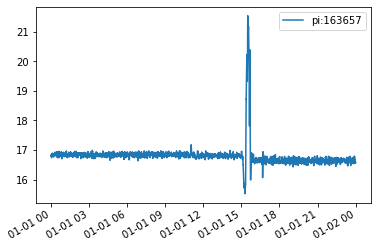

In [84]:
c.datapoints.retrieve(external_id='pi:163657', start=datetime(2018,1,1), end=datetime(2018,1,2)).to_pandas().plot()

### Download files

Download files to disk

In [85]:
files_list = c.files.search(filter={"uploaded":True},limit=5)
files_list

,name,asset_ids,data_set_id,id,uploaded,uploaded_time,created_time,last_updated_time,source,external_id
0,Jordan_data_sheet,[3518903843663221],6133408726791096,375953243056120,True,1659370239465,1659370238985,1659370238985,NaN,NaN
1,handler.zip,NaN,<NA>,410249806612463,True,1658837551439,1658837551342,1658837551342,Datastudio,NaN
2,PH-ME-P-0004-001.pdf,[8628084799352049],<NA>,751071820891431,True,1657139202826,1657139202305,1657186316980,NaN,NaN
3,Thermal Performance Calculation.zip,NaN,<NA>,809392138326632,True,1659535625600,1658393853116,1659535625514,NaN,hx_thermal_perf
4,Nicaragua_data_sheet,[6863695615472442],6133408726791096,1177257115065299,True,1659370241706,1659370241253,1659370241253,NaN,NaN


In [83]:
! mkdir files

In [84]:
c.files.download(directory="files", id=[751071820891431,1191573487368640])

Download a single file to a specific path

In [85]:
c.files.download_to_path("files/test.svg", id=3760564866377817)